In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, SGDClassifier, PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import numpy as np

In [2]:
label_file = open("labels.txt", 'r')
embed_file = open("embeddings.txt", 'r')

In [3]:
param_grid = {'C': [0.1, 1, 10, 1e2, 1e3],
              'gamma': [10, 100, 1000], }
clf = SVC(kernel="rbf", class_weight="balanced", verbose=True)

In [4]:
predictor = GridSearchCV(clf, param_grid, cv=2, verbose=50)
X = np.array([[float(e) for e in line.split(',')] for line in embed_file.read().strip().split('\n')])
l = np.array([int(l) for l in label_file.read().strip().split('\n')])
X_train, X_test, y_train, y_test = train_test_split(X, l, test_size=0.75)
print("Training...")
predictor.fit(X_train, y_train)
print("Trained!")

Training...
Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2; 1/15] START C=0.1, gamma=10............................................
[LibSVM][CV 1/2; 1/15] END .............C=0.1, gamma=10;, score=0.818 total time=   9.8s
[CV 2/2; 1/15] START C=0.1, gamma=10............................................
[LibSVM][CV 2/2; 1/15] END .............C=0.1, gamma=10;, score=0.838 total time=  10.0s
[CV 1/2; 2/15] START C=0.1, gamma=100...........................................
[LibSVM][CV 1/2; 2/15] END ............C=0.1, gamma=100;, score=0.939 total time=  10.3s
[CV 2/2; 2/15] START C=0.1, gamma=100...........................................
[LibSVM][CV 2/2; 2/15] END ............C=0.1, gamma=100;, score=0.943 total time=  10.3s
[CV 1/2; 3/15] START C=0.1, gamma=1000..........................................
[LibSVM][CV 1/2; 3/15] END ...........C=0.1, gamma=1000;, score=0.960 total time=  11.2s
[CV 2/2; 3/15] START C=0.1, gamma=1000.......................................

In [5]:
y_pred = predictor.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     26034
           1       0.64      0.56      0.59      1284

    accuracy                           0.96     27318
   macro avg       0.81      0.77      0.79     27318
weighted avg       0.96      0.96      0.96     27318



In [7]:
print(confusion_matrix(y_test, y_pred))

[[25630   404]
 [  571   713]]


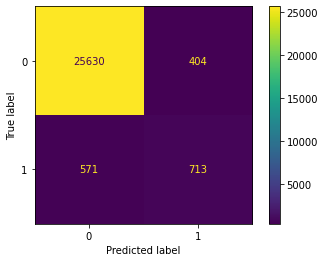

In [8]:
plot_confusion_matrix(predictor, X_test, y_test)

### keras.plot_model

### tensorboard

### net2vis

### netron

### keras.history

### Activation Maximization

### Keract